In [1]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\SHREYAN\Documents\ICPSR_06693\chronic disease Identification\kidney_disease.csv')

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992  0.196985   
bp    0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193  0.188517   
sg   -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710 -0.314295   
al    0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464  0.453528   
su    0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827  0.168583   
bgr   0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000  0.143322   
bu    0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322  1.000000   
sc    0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875  0.586368   
sod  -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848 -0.323054   
pot   0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966  0.357049   
hemo -0.192928 -0.306540  0.602582 -0.634632 -0.224775 -0.306189 -0.610360   

            sc       sod       pot      hemo  
age   0.132531 -

<AxesSubplot:>

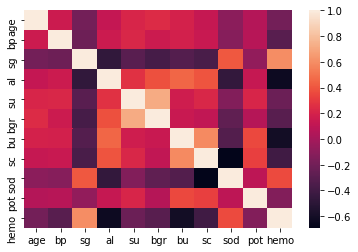

In [13]:
data_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']]
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]
filna = data[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']]
print(data_num.corr())
sns.heatmap(data_num.corr())

In [14]:
pd.pivot_table(data, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'])

,age,al,bgr,bp,bu,hemo,pot,sc,sg,sod,su
classification,,,,,,,,,,,
0,46.516779,0.000000,107.722222,71.351351,32.798611,15.188194,4.337931,0.868966,1.022414,141.731034,0.000000
1,54.425000,1.721154,175.523810,79.705882,72.656170,10.652217,4.883030,4.430720,1.013937,133.882530,0.770732
ckd\t,68.500000,2.000000,164.500000,70.000000,41.000000,9.700000,4.500000,2.550000,1.010000,135.500000,0.000000


In [26]:
data.rc.replace("\t?",data.rc.mode()[0], inplace=True)
data.rc = data.rc.apply(lambda x: float(x))

data.wc.replace("\t?",data.wc.mode()[0], inplace=True)
data.wc = data.wc.apply(lambda x: float(x))


data.pcv.replace(["\t?","\t43"],data.pcv.mode()[0], inplace=True)
data.pcv = data.pcv.apply(lambda x: float(x))

data.classification.replace(["ckd","notckd"],[1,0], inplace=True)
data.classification.replace(["ckd\t"],[1], inplace=True)

In [27]:
data_final_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
data_fincal_cat = data[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

In [28]:
pd.pivot_table(data, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'])

,age,al,bgr,bp,bu,hemo,pcv,pot,rc,sc,sg,sod,su,wc
classification,,,,,,,,,,,,,,
0,46.573333,0.00,108.253333,71.466667,33.166667,15.086667,46.166667,4.3400,5.302667,0.883333,1.022333,141.606667,0.0,7719.333333
1,54.692000,1.44,149.466000,78.440000,60.544300,11.026400,34.928000,4.4084,4.451600,25.767700,1.015010,136.184000,0.0,8446.150000


In [29]:
for i in filna.columns:
    if data[i].isna().sum() > 0 :
        if data[i].dtype == 'float64':
            data[i].fillna(data[i].median(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)

In [30]:
def outlinefree(dataCol):    
    sorted(dataCol)
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1   
    LowerRange = Q1-(1.5 * IQR)   
    UpperRange = Q3+(1.5 * IQR)   
    return LowerRange,UpperRange

In [31]:
Lowage,Upage = outlinefree(data.age)
Lowbp,Upbp = outlinefree(data.bp)
Lowsg,Upsg = outlinefree(data.sg)
Lowal,Upal = outlinefree(data.al)
Lowsu,Upsu = outlinefree(data.su)
Lowbgr,Upbgr = outlinefree(data.bgr)
Lowbu,Upbu = outlinefree(data.bu)
Lowsc,Upsc = outlinefree(data.sc)
Lowsod,Upsod = outlinefree(data.sod)
Lowpot,Uppot = outlinefree(data.pot)
Lowhemo,Uphemo = outlinefree(data.hemo)
Lowpcv,Uppcv = outlinefree(data.pcv)
Lowwc,Upwc = outlinefree(data.wc)
Lowrc,Uprc = outlinefree(data.rc)

In [32]:
data.age.replace(list(data[(data.age < Lowage)].age),Lowage , inplace=True)
data.age.replace(list(data[(data.age > Upage)].age),Upage , inplace=True)

data.bp.replace(list(data[(data.bp < Lowbp)].bp),Lowbp , inplace=True)
data.bp.replace(list(data[(data.bp > Upbp)].bp),Upbp , inplace=True)

data.sg.replace(list(data[(data.sg < Lowsg)].sg),Lowsg , inplace=True)
data.sg.replace(list(data[(data.sg > Upsg)].sg),Upsg , inplace=True)

data.al.replace(list(data[(data.al < Lowal)].al),Lowal , inplace=True)
data.al.replace(list(data[(data.al > Upal)].al),Upal , inplace=True)

data.su.replace(list(data[(data.su < Lowsu)].su),Lowsu , inplace=True)
data.su.replace(list(data[(data.su > Upsu)].su),Upsu , inplace=True)

data.bgr.replace(list(data[(data.bgr < Lowbgr)].bgr),Lowbgr , inplace=True)
data.bgr.replace(list(data[(data.bgr > Upbgr)].bgr),Upbgr , inplace=True)

data.bu.replace(list(data[(data.bu < Lowbu)].bu),Lowbu , inplace=True)
data.bu.replace(list(data[(data.bu > Upbu)].bu),Upbu , inplace=True)

data.sc.replace(list(data[(data.sc < Lowsc)].sc),Lowbu , inplace=True)
data.sc.replace(list(data[(data.sc > Upsc)].sc),Upbu , inplace=True)

data.sod.replace(list(data[(data.sod < Lowsod)].sod),Lowsod , inplace=True)
data.sod.replace(list(data[(data.sod > Upsod)].sod),Upsod , inplace=True)

data.pot.replace(list(data[(data.pot < Lowpot)].pot),Lowpot , inplace=True)
data.pot.replace(list(data[(data.pot > Uppot)].pot),Uppot , inplace=True)

data.hemo.replace(list(data[(data.hemo < Lowhemo)].hemo),Lowhemo , inplace=True)
data.hemo.replace(list(data[(data.hemo > Uphemo)].hemo),Uphemo , inplace=True)

data.pcv.replace(list(data[(data.pcv < Lowpcv)].pcv),Lowpcv , inplace=True)
data.pcv.replace(list(data[(data.pcv > Uppcv)].pcv),Uppcv , inplace=True)

data.wc.replace(list(data[(data.wc < Lowwc)].wc),Lowwc , inplace=True)
data.wc.replace(list(data[(data.wc > Upwc)].wc),Upwc , inplace=True)

data.rc.replace(list(data[(data.rc < Lowrc)].rc),Lowrc , inplace=True)
data.rc.replace(list(data[(data.rc > Uprc)].rc),Uprc , inplace=True)

In [75]:
finaldata = data.loc[:,['classification','age','bp','al','bgr','bu','sc','hemo','pcv','wc','rc']]

In [76]:
final_dataset = pd.get_dummies(finaldata)

In [77]:
features = final_dataset.iloc[:,1:].values
label = final_dataset.iloc[:,0].values

In [78]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=112)

classimodel= LogisticRegression()  
classimodel.fit(X_train,y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

y_pred =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.9649122807017544
[[41  1]
 [ 3 55]]


In [79]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.9821428571428571 

 recall score:  0.9482758620689655 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.98      0.95      0.96        58

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [80]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=43)

Knnmodel= KNeighborsClassifier()  
Knnmodel.fit(X_train, y_train)
trainscore =  Knnmodel.score(X_train,y_train)
testscore =  Knnmodel.score(X_test,y_test)  

y_pred =  Knnmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.8571428571428571 

[[36  4]
 [12 48]]


In [81]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  0.9230769230769231 

 recall score:  0.8 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        40
           1       0.92      0.80      0.86        60

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



In [82]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=82)

NBmodel=  GaussianNB()  
NBmodel.fit(X_train, y_train)
trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_pred =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.9586776859504132 

[[37  0]
 [ 5 58]]


In [83]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  0.9206349206349206 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.92      0.96        63

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



0.9990933333333333


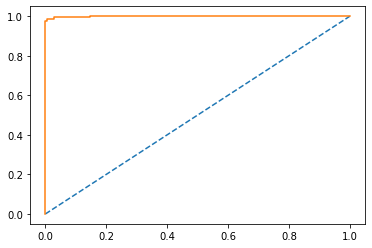

In [84]:
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.9745600000000001


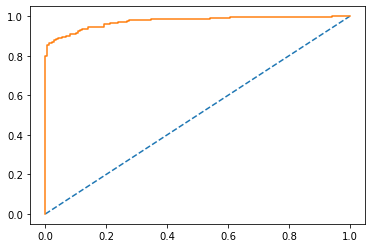

In [85]:
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)